In [1]:
import addons
import numpy as np
import pandas as pd 

/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



### Computing Synchrony

Measurement of different Synchrony quantities from the spike times obtained in the simulation. 

Measurements:

    - Synchrony (as defined by Potjans Diesmann)

    - Second Synchrony measurement (to make sure there are no bias)

    - Irregularity (CV ISI as defined by Potjans Diesmann)
    
    - LvR (as defined by pronold, 2024)

Irregularity and LvR will have a singular value for each population, and a pdf for each population, aswell

In [2]:
name = addons.analysis_dict["name"]
neuron_id = np.loadtxt("data_og/population_nodeids.dat",dtype=int)
num_neurons = []
for i in range(len(neuron_id)):
    num_neurons = np.append(num_neurons,int(neuron_id[i][1]-neuron_id[i][0]+1))
num_neurons = num_neurons.astype(int)

/home/hyc_1/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:885: RuntimeWarning:invalid value encountered in divide


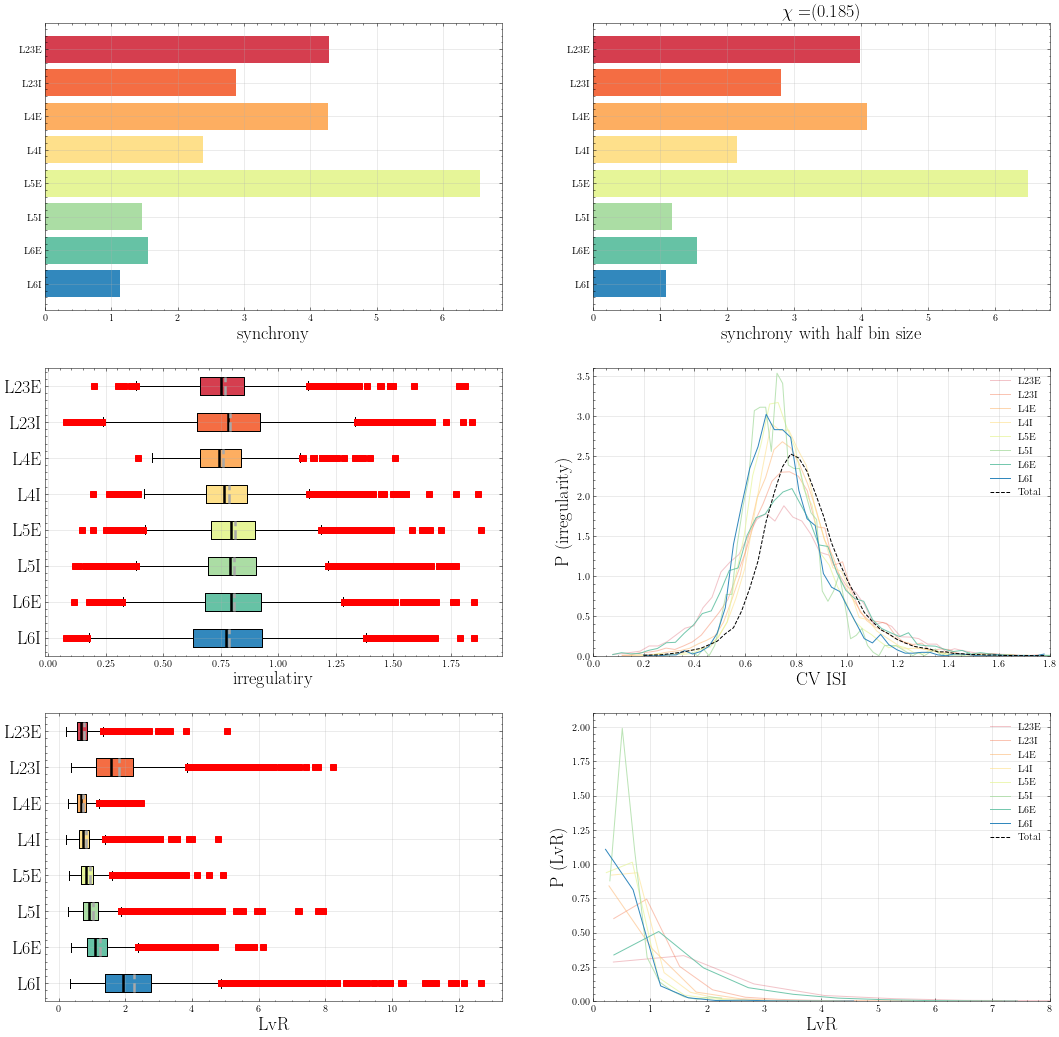

In [3]:
synchrony_pd, synchrony_chi, irregularity, irregularity_pdf, lvr, lvr_pdf, times_s, chi = addons.analyse_synchrony(num_neurons)
addons.plot_synchrony(synchrony_pd,synchrony_chi,irregularity,irregularity_pdf,lvr,lvr_pdf, chi )

In [5]:
np.savetxt(name + "synchrony.dat",synchrony_pd)
np.savetxt(name + "irregularity.dat",irregularity)
np.savetxt(name + "lvr.dat",lvr)

for i in irregularity_pdf:
    np.savetxt(name + "irregularities/irregularity_"+str(i)+".dat",irregularity_pdf[i])
for i in lvr_pdf:
    np.savetxt(name + "lvrs/lvr_"+str(i)+".dat",lvr_pdf[i])
for i in times_s:
    np.savetxt(name + "times/time_"+str(i)+".dat",times_s[i])


### Computing Firing Rates

Measurement of different Firing Rates quantities from the spike times obtained in the simulation. 

Measurements:

    - Firing rate histogram and pdf per population
    
    - Color map of the evolution of firing rates as a function of time

In [ ]:
spike_rates = addons.analyse_firing_rates()
addons.plot_firing_rates(spike_rates)

In [6]:
for i in spike_rates:
    np.savetxt(name + "spike_rates/spike_rate_"+str(i)+".dat",spike_rates[i])

### Computing Correlations

Measurement of Correlations between different quantities of the simulation.

For that, it's important to first load all of the data

In [6]:
##### NUMERO DE NEURONAS
voltage_data = addons.load_data("data_og/","voltmeter",)
time_data = voltage_data[0]["time_ms"][0::num_neurons[0]]
#time_data = addons.get_time(voltage_data,num_neurons[0]) 
data_pop = {}
ex_current_pop = {}
in_current_pop = {}
pop_activity = {}
names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
for i in range(len(num_neurons)):
    data_pop[i] = addons.split_data(voltage_data[i], num_neurons[i])

del(voltage_data)
#ex_current_data = addons.load_data("data_og/","ex_current",type="Current")
#for i in range(len(num_neurons)):
#    ex_current_pop[i] = addons.split_data(ex_current_data[i],num_neurons[i],type="Current")

#del(ex_current_data)
#in_current_data = addons.load_data("data_og/","in_current",type="Current")
#for i in range(len(num_neurons)):
#    in_current_pop[i] = addons.split_data(in_current_data[i], num_neurons[i],type="Current")

#del(in_current_data)

for i in range(len(num_neurons)):
    pop_activity[names[i]] = np.loadtxt(addons.analysis_dict["name"]+"/pop_activities/pop_activity_"+str(i)+".dat")


In [7]:
data_voltages, times, times_help = addons.prepare_data(data_pop)
#data_voltages, data_excitatory, data_inhibitory, times, times_help = addons.prepare_data(data_pop,ex_current_pop,in_current_pop)

(-61.0, -57.0)

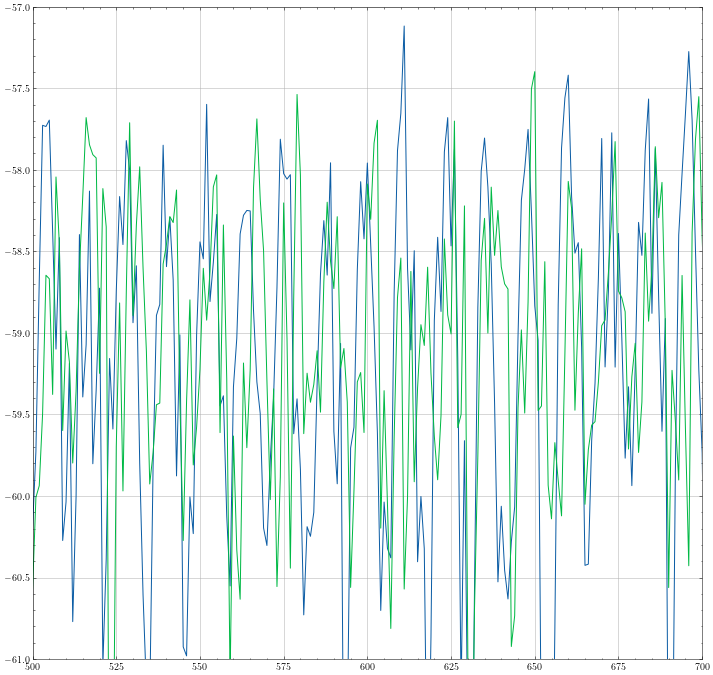

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
names = ['L4E','L5E']
for i in names:
        plt.plot(data_voltages[i])
plt.xlim(500,700)
plt.grid()
plt.ylim(-61,-57)

### Computing FFT

FFT of both of the signals: the convolved and the mean voltage

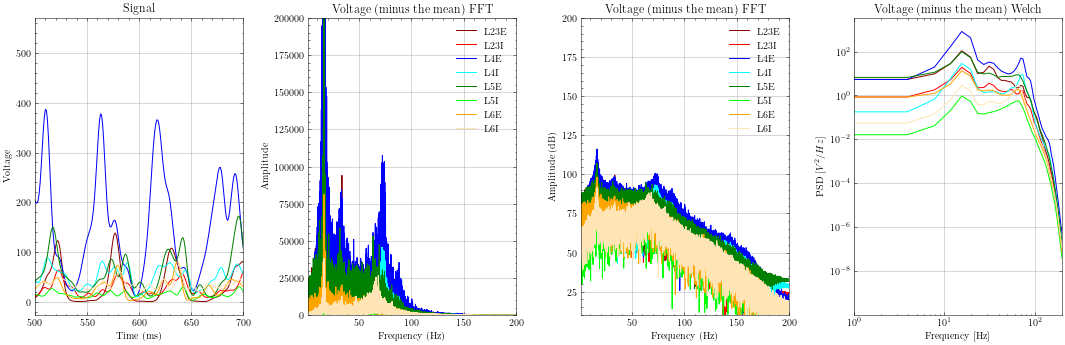

In [15]:
FFT_signal, FFT_frequencies, Welsh_frequencies, Welsh_signal, FFT_index  = addons.compute_FFT(pop_activity,lim_y=200000,lim_x=200,high_log=200,freq_sample=0.001,freq_sample_welsh=1000,save=False)

/tmp/ipykernel_481602/3030496408.py:7: MatplotlibDeprecationWarning:Passing the NFFT parameter of psd() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
/tmp/ipykernel_481602/3030496408.py:13: MatplotlibDeprecationWarning:Passing the NFFT parameter of psd() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.


(0.0, 200.0)

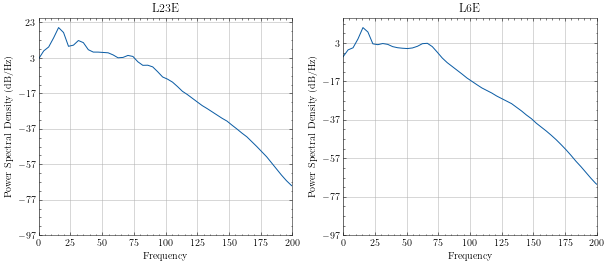

In [11]:
#First, calculate the pwoer spectral densities of both the signals (L23E and L6E)
plt.figure(figsize=(10,4))
nfft = 256
dt = 0.001
plt.subplot(121)

plt.psd(pop_activity["L23E"]-np.mean(pop_activity["L23E"]),nfft,1/dt)
plt.xlim(0,200)
plt.title("L23E")

plt.subplot(122)

plt.psd(pop_activity["L6E"]-np.mean(pop_activity["L6E"]),nfft,1/dt)
plt.title("L6E")
plt.xlim(0,200)


/tmp/ipykernel_481602/4211239943.py:3: MatplotlibDeprecationWarning:Passing the NFFT parameter of csd() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.


(0.0, 200.0)

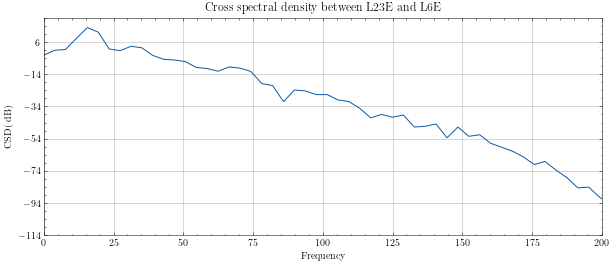

In [12]:
#Seoncly calculate the cross-spectral density, which is Fourier transform of the cross-correlation function
plt.figure(figsize=(10,4))
csdxy, fcsd = plt.csd(pop_activity["L23E"]-np.mean(pop_activity["L23E"]),pop_activity["L6E"]-np.mean(pop_activity["L6E"]), nfft, 1./dt)
plt.ylabel('CSD( dB)')
plt.title('Cross spectral density between L23E and L6E')
plt.xlim(0,200)

/tmp/ipykernel_481602/1924927888.py:6: MatplotlibDeprecationWarning:Passing the NFFT parameter of cohere() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.


gamma95 0.0438650956746931 edof 67.78515109290706


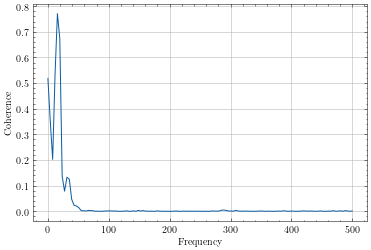

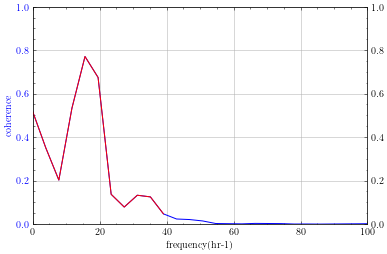

In [13]:
#Then using the cross-spectral density we can calculate the phase and we can calculate the coherence. Now we can combine the coherence and the peaks that rise above the 95% confidence level
s1 = pop_activity["L23E"] - np.mean(pop_activity["L23E"])
s2 = pop_activity["L6E"] - np.mean(pop_activity["L6E"])


cxy, fcoh = plt.cohere(s1,s2,nfft,1./dt)

#calculate 95% confidence level
edof = (len(s1)/(nfft/2)) * cxy.mean() #equivalent degrees of freedom: (length(timeseries)/windowhalfwidth)*mean_coherence
gamma95 = 1.-(0.05)**(1./(edof-1.))
conf95 = np.where(cxy>gamma95)
print('gamma95', gamma95, 'edof', edof)

#Plot twin plot
fig, ax1 = plt.subplots()

#Plot on ax1 the coherence
ax1.plot(fcoh,cxy,'b-')
ax1.set_xlabel('frequency(hr-1)')
ax1.set_ylim([0,1])
ax1.set_xlim([0,100])
#Make the y-axis label and tick labels match the line color
ax1.set_ylabel('coherence',color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# plot on ax2 the phase
ax2 = ax1.twinx()
ax2.plot(fcoh[conf95], cxy[conf95], 'r')
ax2.set_ylim([0,1])
ax2.set_xlim([0,100])

ax1.grid(True)

Compute the bispectrum and threenorm

In [14]:
import numpy as np 
from pybispectra import (PAC, Bispectrum, ResultsCFC, Threenorm, compute_fft, get_example_data_paths)
#It's messy to work with, let's try to obtain bispectrum and bicoherence manually

In [43]:
f1 = 20
f2 = 30
s1 = FFT_signal["L23E"]
s2 = FFT_signal["L23E"]

ind1 = np.where(FFT_frequencies == f1)[0][0]
ind2 = np.where(FFT_frequencies == f2)[0][0]
ind3 = np.where(FFT_frequencies == f1+ f2)[0][0]

BIS = np.abs(np.mean(s1[ind1]*s2[ind2]*np.conj(s1[ind3])))

In [72]:
def ComputeBISBIC(S1,S2,FFT_frequencies,Freqs1,Freqs2):
    BIS = np.zeros((len(Freqs1),len(Freqs2)))
    BIC = np.zeros((len(Freqs1),len(Freqs2)))
    for i, f1 in enumerate(Freqs1):
        try:
            ind1 = np.where(FFT_frequencies == f1)[0][0]
        except:
            helper = FFT_frequencies[min(range(len(FFT_frequencies)), key = lambda i: abs(FFT_frequencies[i]-f1))]
            ind1 = np.where(FFT_frequencies == helper)[0][0]

        for j, f2 in enumerate(Freqs2):
            try:
                ind2 = np.where(FFT_frequencies == f2)[0][0]
            except:
                helper = FFT_frequencies[min(range(len(FFT_frequencies)), key = lambda i: abs(FFT_frequencies[i]-f2))]
                ind2 = np.where(FFT_frequencies == helper)[0][0]
            try:
                ind3 = np.where(FFT_frequencies == f1 + f2)[0][0]
            except:
                helper = FFT_frequencies[min(range(len(FFT_frequencies)), key = lambda i: abs(FFT_frequencies[i]-(f2+f1)))]
                ind3 = np.where(FFT_frequencies == helper)[0][0]
            BIS[i,j] = np.abs(np.mean(S1[ind1]*S2[ind2]*np.conj(S2[ind3])))
            BIC[i,j] = BIS[i,j] / ( np.sqrt( np.mean( np.abs(S1[ind1] * S2[ind2])**2 * np.abs(S2[ind3])**2 )   ) )
    return BIS, BIC

            

In [83]:
freqs_alpha = np.linspace(8,12,100)
freqs_gamma_low = np.linspace(30,48,100)
freqs_gamma_high = np.linspace(52,80,100)


BIS = {}
BIC = {}

for i, n in enumerate(FFT_signal):
    BIS[i] = {}
    BIC[i] = {}
    for j, m in enumerate(FFT_signal):
        BIS[i][j], BIC[i][j] = ComputeBISBIC(FFT_signal[n],FFT_signal[m],FFT_frequencies,freqs_alpha,freqs_alpha)